In [118]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [119]:
ds = xr.open_dataset("diff.nc4")

In [120]:
temperature_diff = ds['T']
rh_diff = ds['RH']
u_diff = ds['U']
v_diff = ds['V']

In [121]:
lev_values = ds['lev'].values

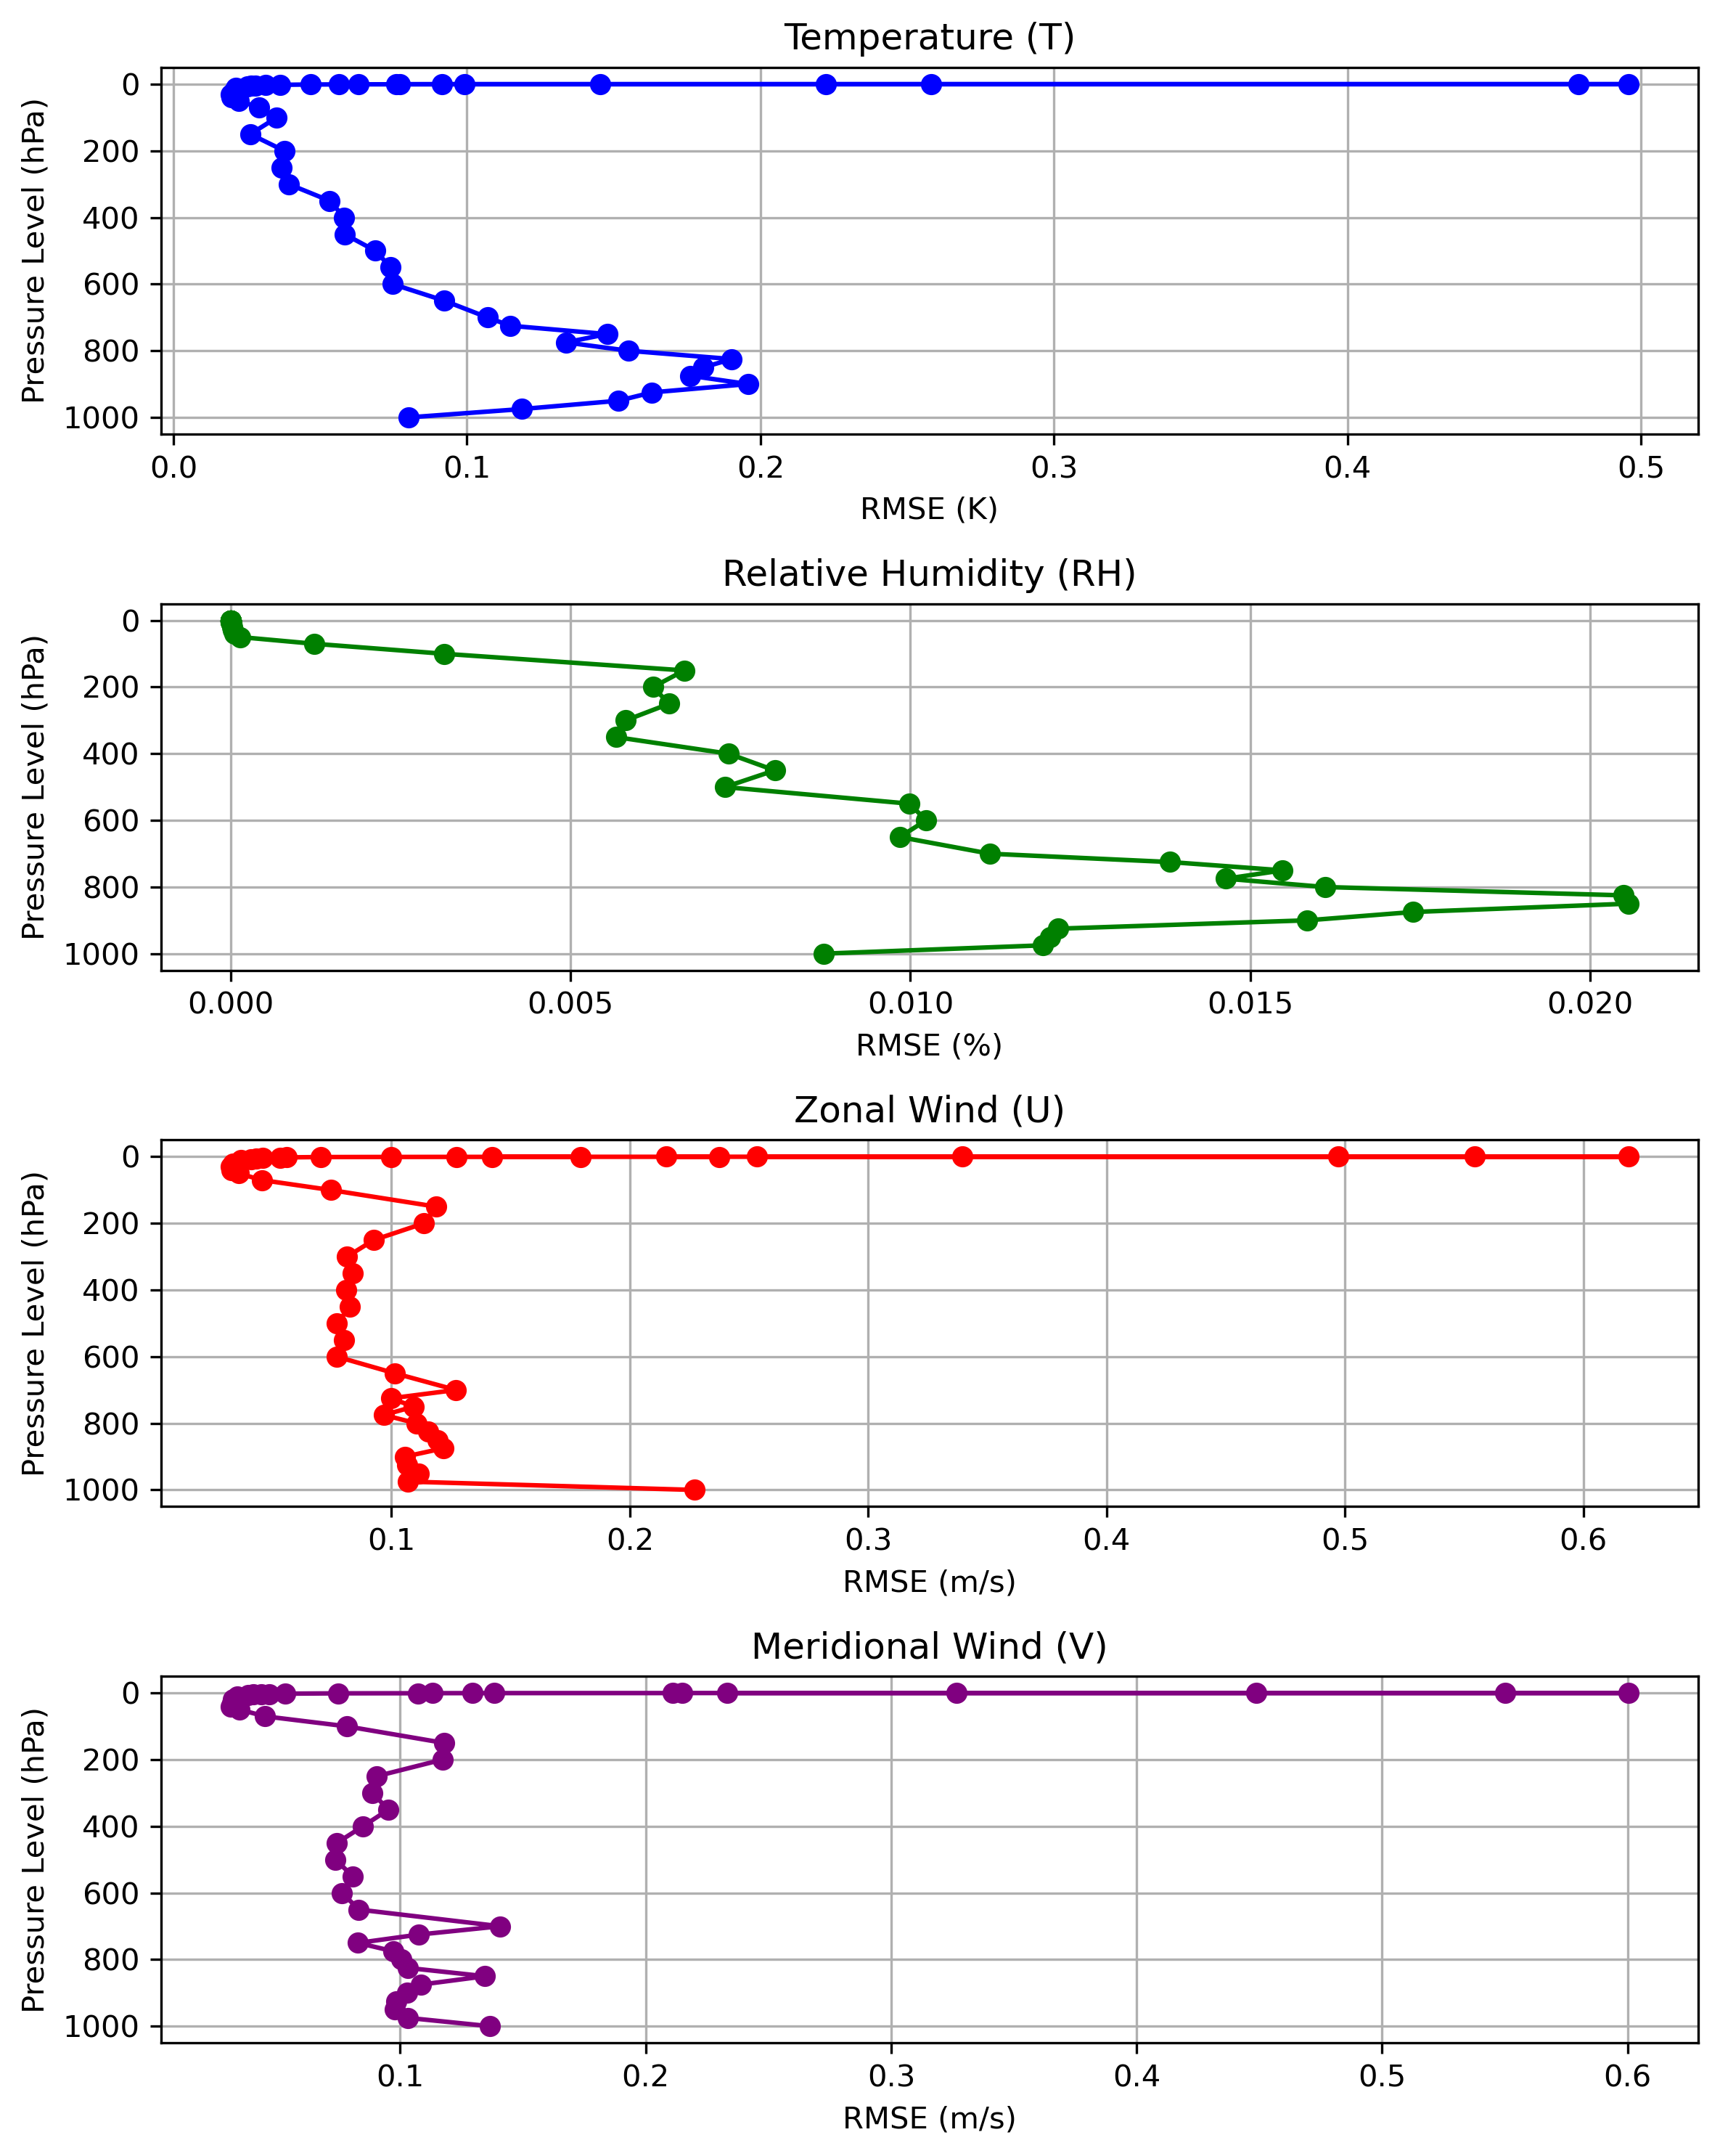

In [122]:
# Calc RMSE of differences
rmse_t_per_level = np.sqrt((temperature_diff**2).mean(dim=('lat', 'lon', 'time')))
rmse_rh_per_level = np.sqrt((rh_diff**2).mean(dim=('lat', 'lon', 'time')))
rmse_u_per_level = np.sqrt((u_diff**2).mean(dim=('lat', 'lon', 'time')))
rmse_v_per_level = np.sqrt((v_diff**2).mean(dim=('lat', 'lon', 'time')))

# Convert to numpy arrays for plotting
rmse_t_per_level_values = rmse_t_per_level.values
rmse_rh_per_level_values = rmse_rh_per_level.values
rmse_u_per_level_values = rmse_u_per_level.values
rmse_v_per_level_values = rmse_v_per_level.values

# Plot RMSE 
plt.figure(figsize=(8, 10),dpi=300)

# Plot for Temperature
plt.subplot(4, 1, 1)
plt.plot(rmse_per_level_values, lev_values, marker='o', linestyle='-', color='b')
plt.gca().invert_yaxis()
plt.xlabel('RMSE (K)')
plt.ylabel('Pressure Level (hPa)')
plt.title('Temperature (T)')
plt.grid(True)

# Plot for RH
plt.subplot(4, 1, 2)
plt.plot(rmse_rh_per_level_values, lev_values, marker='o', linestyle='-', color='g')
plt.gca().invert_yaxis()
plt.xlabel('RMSE (%)')
plt.ylabel('Pressure Level (hPa)')
plt.title('Relative Humidity (RH)')
plt.grid(True)

# Plot for U
plt.subplot(4, 1, 3)
plt.plot(rmse_u_per_level_values, lev_values, marker='o', linestyle='-', color='r')
plt.gca().invert_yaxis()
plt.xlabel('RMSE (m/s)')
plt.ylabel('Pressure Level (hPa)')
plt.title('Zonal Wind (U)')
plt.grid(True)

# Plot for V
plt.subplot(4, 1, 4)
plt.plot(rmse_v_per_level_values, lev_values, marker='o', linestyle='-', color='purple')
plt.gca().invert_yaxis()
plt.xlabel('RMSE (m/s)')
plt.ylabel('Pressure Level (hPa)')
plt.title('Meridional Wind (V)')
plt.grid(True)

plt.tight_layout()
plt.savefig("RMSE_diffs.png")
plt.show()

In [123]:
temperature_diff_flat = temperature_diff.values.flatten()
rh_diff_flat = rh_diff.values.flatten()
u_diff_flat = u_diff.values.flatten()
v_diff_flat = v_diff.values.flatten()

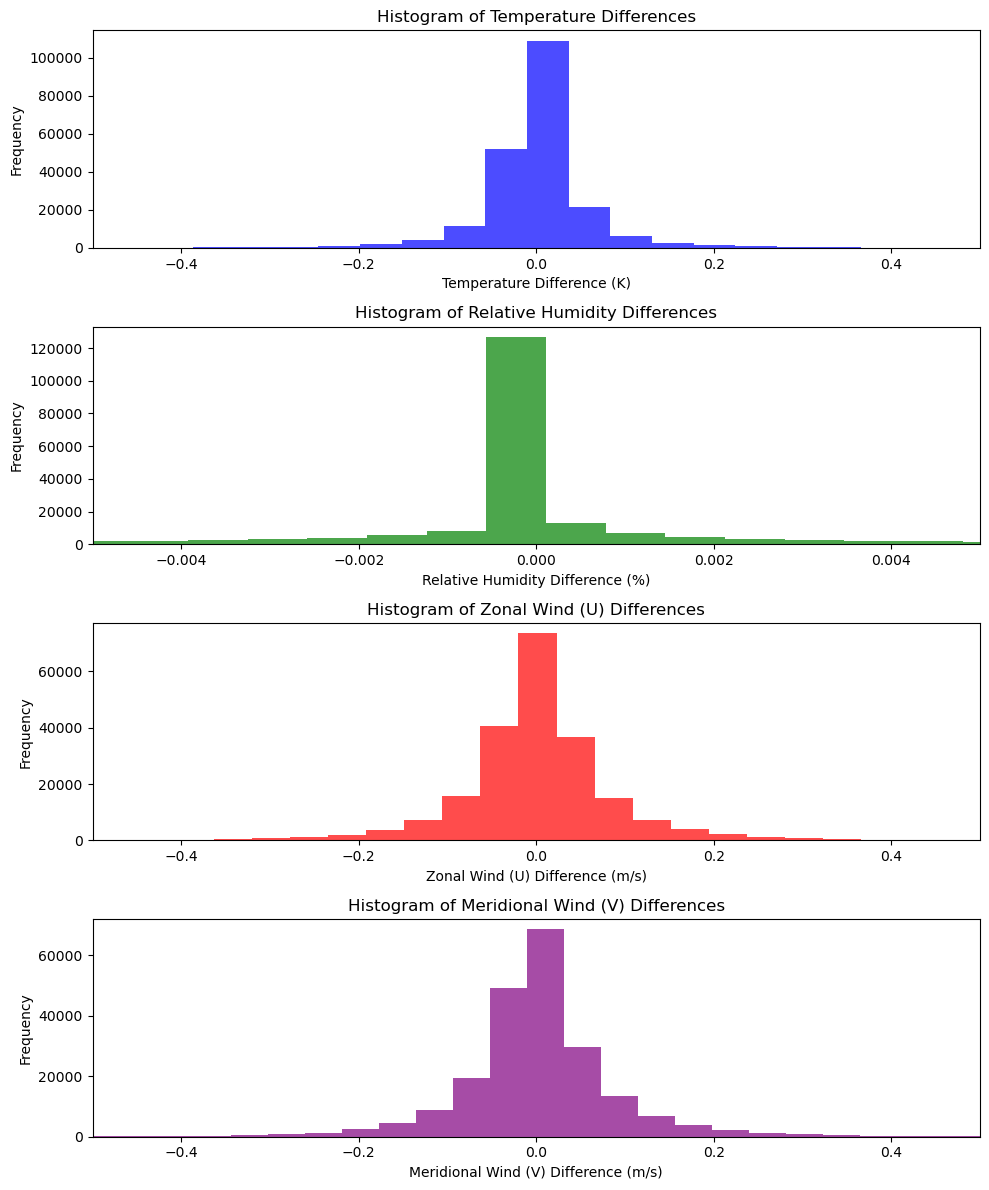

In [124]:
# Create a figure with subplots to display the histograms with a smaller x-axis range
plt.figure(figsize=(10, 12))

# Temperature Difference Histogram with smaller x-axis range
plt.subplot(4, 1, 1)
plt.hist(temperature_diff_flat, bins=1000, color='b', alpha=0.7)
plt.xlim([-0.5, 0.5])  # Narrowing the x-axis range
plt.xlabel('Temperature Difference (K)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Differences')

# Relative Humidity Difference Histogram with smaller x-axis range
plt.subplot(4, 1, 2)
plt.hist(rh_diff_flat, bins=1000, color='g', alpha=0.7)
plt.xlim([-0.005, 0.005])  # Narrowing the x-axis range
plt.xlabel('Relative Humidity Difference (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Relative Humidity Differences')

# Zonal Wind (U) Difference Histogram with smaller x-axis range
plt.subplot(4, 1, 3)
plt.hist(u_diff_flat, bins=1000, color='r', alpha=0.7)
plt.xlim([-0.5, 0.5])  # Narrowing the x-axis range
plt.xlabel('Zonal Wind (U) Difference (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Zonal Wind (U) Differences')

# Meridional Wind (V) Difference Histogram with smaller x-axis range
plt.subplot(4, 1, 4)
plt.hist(v_diff_flat, bins=1000, color='purple', alpha=0.7)
plt.xlim([-0.5, 0.5])  # Narrowing the x-axis range
plt.xlabel('Meridional Wind (V) Difference (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Meridional Wind (V) Differences')

# Adjust layout for readability
plt.tight_layout()
plt.show()

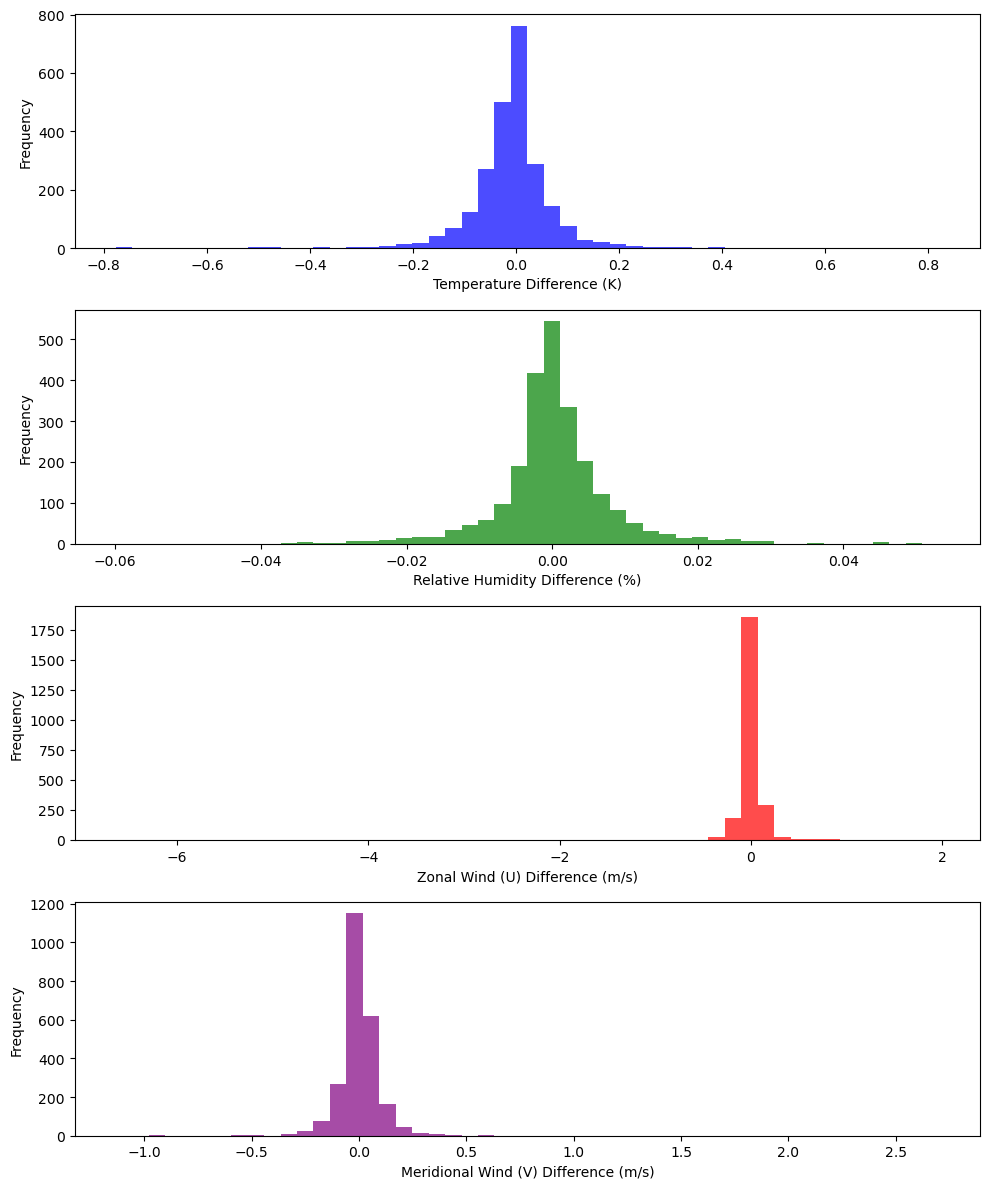

In [125]:
# Make histograms for just 1000hpa level
level_1000hpa = 1000  # Set target pressure level

# Subset data at the 1000 hPa level for each variable
temp_diff_1000hpa = temperature_diff.sel(lev=level_1000hpa).values.flatten()
rh_diff_1000hpa = rh_diff.sel(lev=level_1000hpa).values.flatten()
u_diff_1000hpa = u_diff.sel(lev=level_1000hpa).values.flatten()
v_diff_1000hpa = v_diff.sel(lev=level_1000hpa).values.flatten()

# Create a figure for histograms at the 1000 hPa level
plt.figure(figsize=(10, 12))

# Temperature Difference Histogram at 1000 hPa
plt.subplot(4, 1, 1)
plt.hist(temp_diff_1000hpa, bins=50, color='b', alpha=0.7)
plt.xlabel('Temperature Difference (K)')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
plt.hist(rh_diff_1000hpa, bins=50, color='g', alpha=0.7)
plt.xlabel('Relative Humidity Difference (%)')
plt.ylabel('Frequency')

plt.subplot(4, 1, 3)
plt.hist(u_diff_1000hpa, bins=50, color='r', alpha=0.7)
plt.xlabel('Zonal Wind (U) Difference (m/s)')
plt.ylabel('Frequency')

plt.subplot(4, 1, 4)
plt.hist(v_diff_1000hpa, bins=50, color='purple', alpha=0.7)
plt.xlabel('Meridional Wind (V) Difference (m/s)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


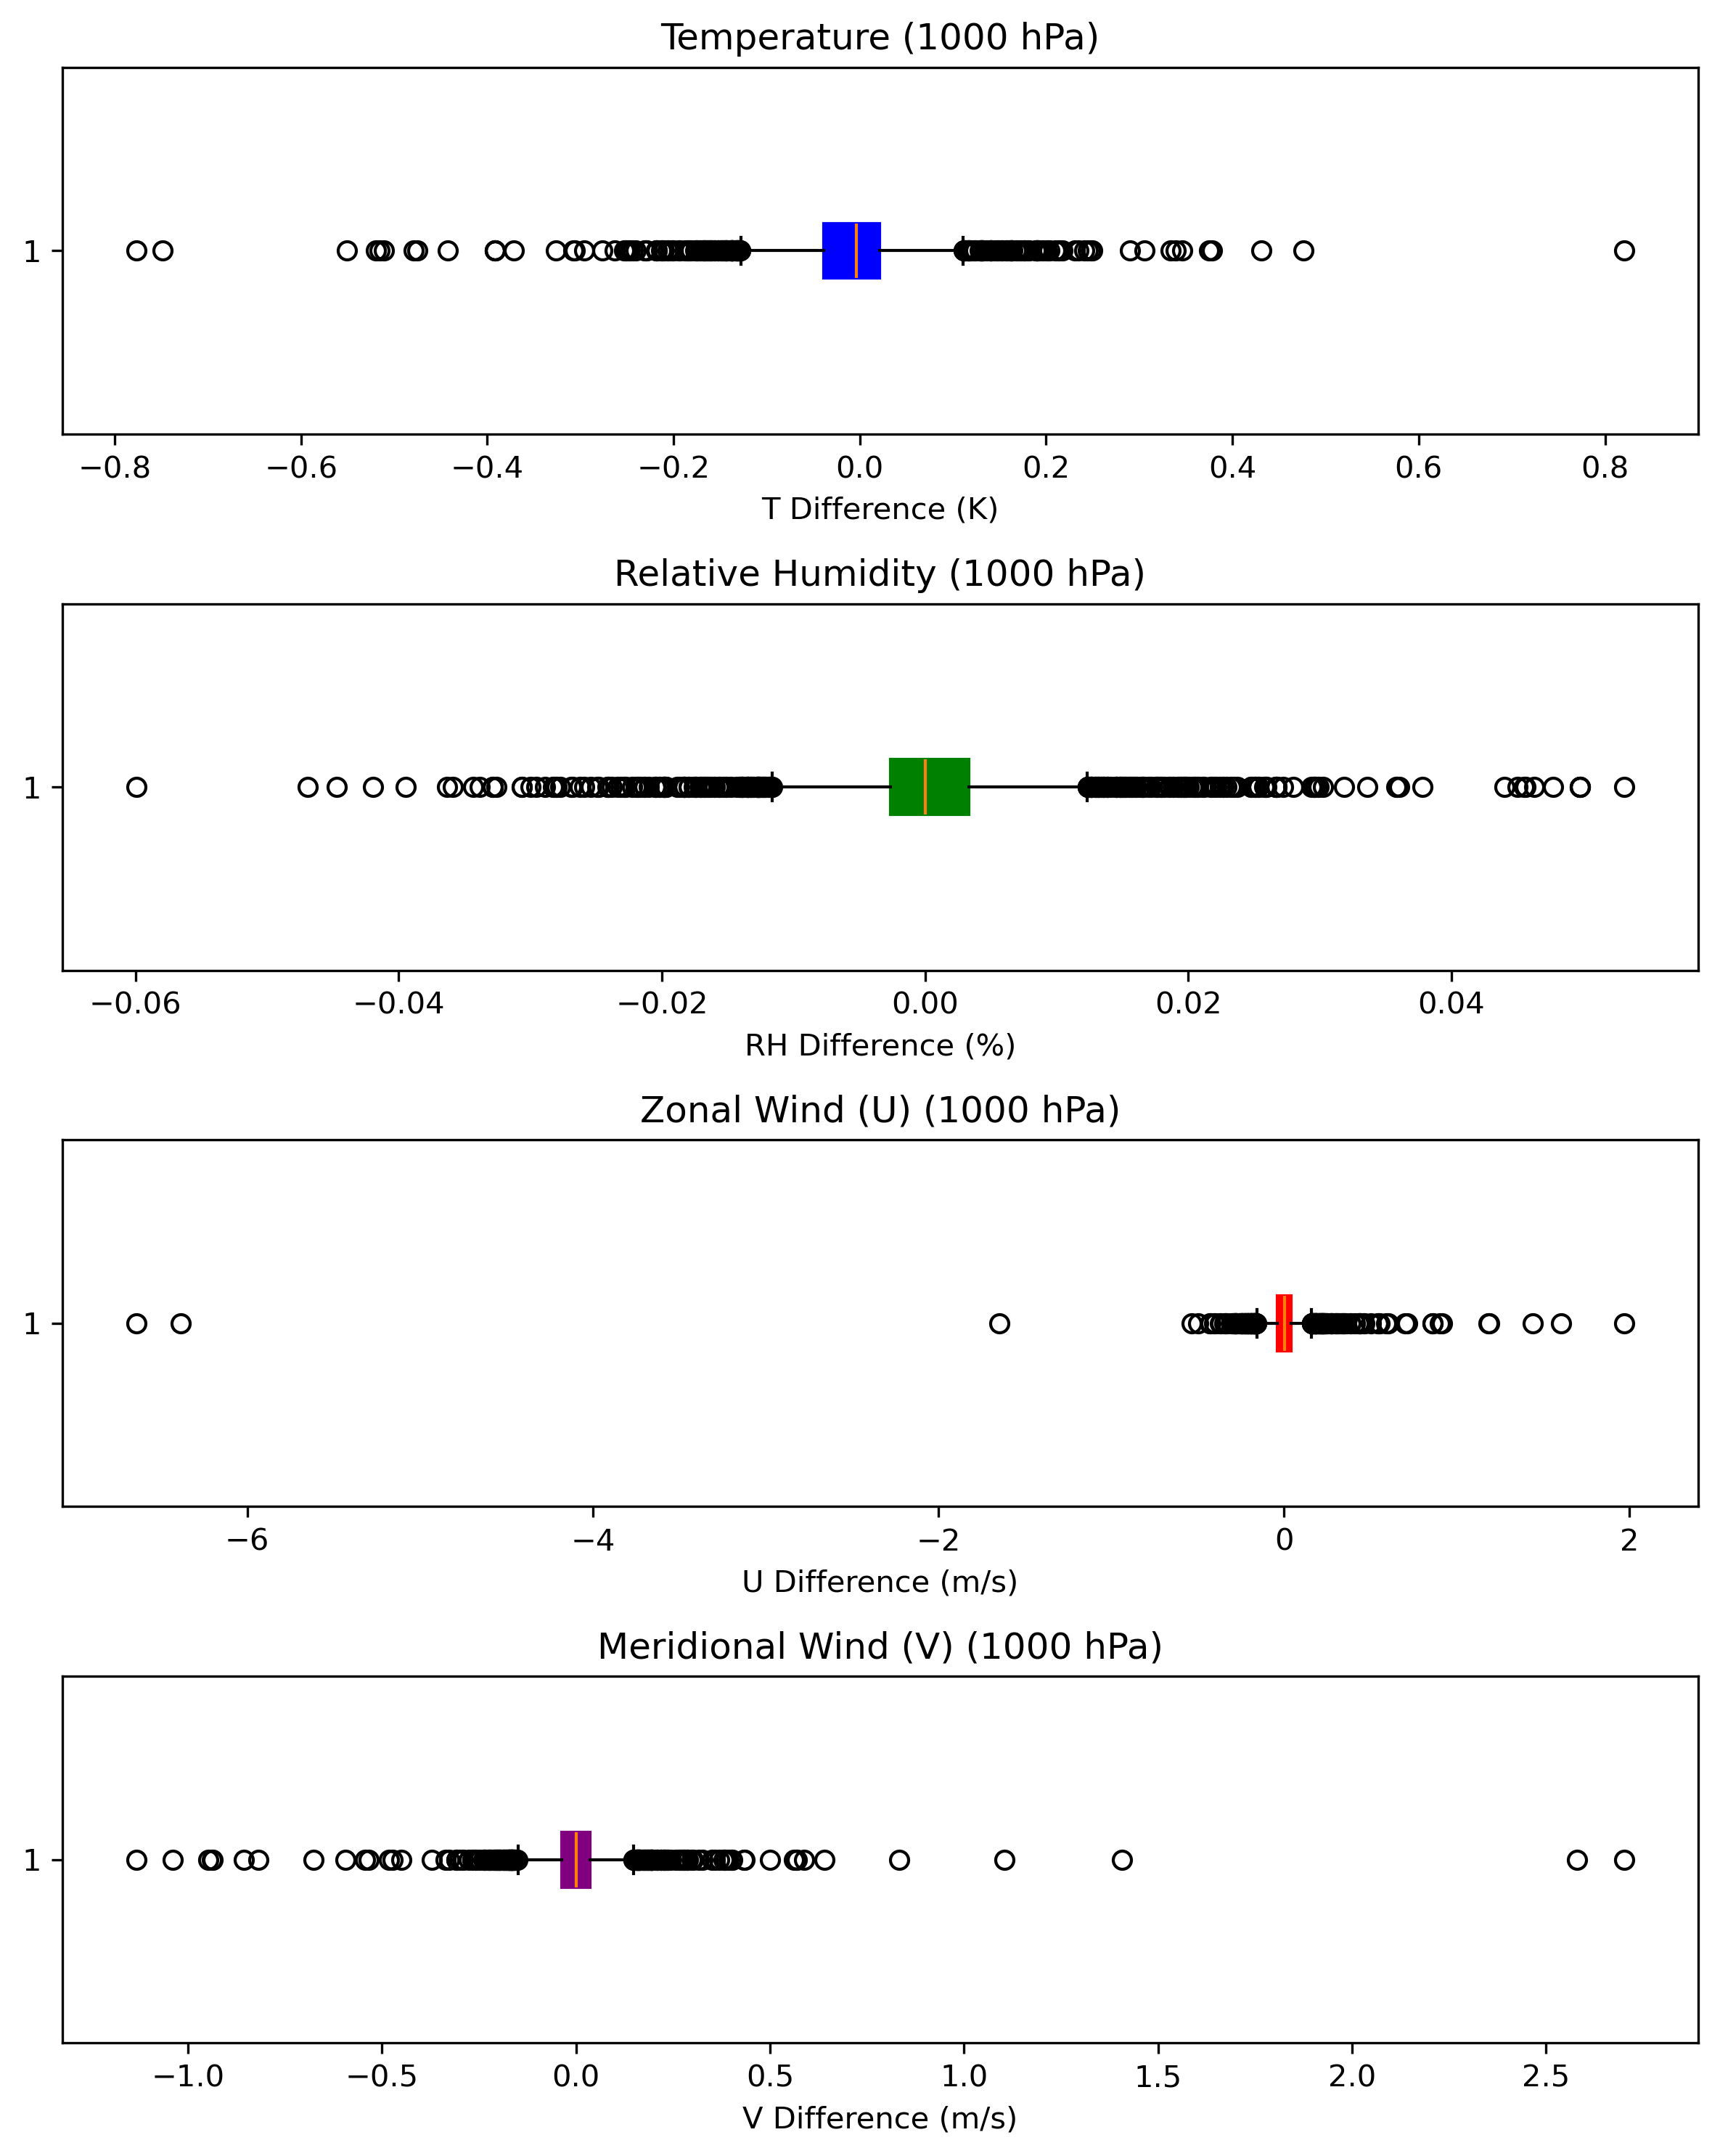

In [126]:
# Make boxplots of diffs at 1000hpa level

plt.figure(figsize=(8, 10), dpi=300)

# Temperature Difference Box Plot at 1000 hPa
plt.subplot(4, 1, 1)
plt.boxplot(temp_diff_1000hpa[~np.isnan(temp_diff_1000hpa)], vert=False, patch_artist=True, boxprops=dict(facecolor='b', color='b'))
plt.xlabel('T Difference (K)')
plt.title(f'Temperature (1000 hPa)')

# Relative Humidity Difference Box Plot at 1000 hPa
plt.subplot(4, 1, 2)
plt.boxplot(rh_diff_1000hpa[~np.isnan(rh_diff_1000hpa)], vert=False, patch_artist=True, boxprops=dict(facecolor='g', color='g'))
plt.xlabel('RH Difference (%)')
plt.title(f'Relative Humidity (1000 hPa)')

# Zonal Wind (U) Difference Box Plot at 1000 hPa
plt.subplot(4, 1, 3)
plt.boxplot(u_diff_1000hpa[~np.isnan(u_diff_1000hpa)], vert=False, patch_artist=True, boxprops=dict(facecolor='r', color='r'))
plt.xlabel('U Difference (m/s)')
plt.title(f'Zonal Wind (U) (1000 hPa)')

# Meridional Wind (V) Difference Box Plot at 1000 hPa
plt.subplot(4, 1, 4)
plt.boxplot(v_diff_1000hpa[~np.isnan(v_diff_1000hpa)], vert=False, patch_artist=True, boxprops=dict(facecolor='purple', color='purple'))
plt.xlabel('V Difference (m/s)')
plt.title(f'Meridional Wind (V) (1000 hPa)')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig("boxplots_sfc.png")
plt.show()

